In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [4]:
# Load dataset
teams_df = pd.read_csv("../data/teams.csv")
teams_df.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum


In [5]:
# Drop unnecessary columns
teams_df = teams_df.drop(["year", "seeded", "lgID", "tmID", "franchID", "confID", "divID", "name", "arena", "firstRound", "semis", "finals"], axis=1)

# Convert "playoff" column to binary (Y: 1, N: 0)
teams_df["playoff"] = teams_df["playoff"].map({"Y": 1, "N": 0})

teams_df.head()

,rank,playoff,seeded,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,...,lost,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend
0,7,0,0,895,2258,542,725,202,598,340,...,30,34,1,16,3,14,2,18,6825,141379
1,2,1,0,1089,2428,569,755,114,374,404,...,16,34,12,5,6,11,10,12,6950,120737
2,8,0,0,812,1903,431,577,131,386,305,...,24,32,5,11,3,13,5,16,6475,90963
3,4,1,0,746,1780,410,528,153,428,309,...,14,32,11,5,7,9,15,6,6500,105525
4,2,1,0,770,1790,490,663,211,527,302,...,14,32,11,5,7,9,12,9,6450,106670


In [6]:
# Split dataset in features and target variable
X = teams_df.drop("playoff", axis=1) # Features
y = teams_df["playoff"] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train/Test size:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Create and train Decision Tree Classifer model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Train/Test size: (113, 49) (29, 49) (113,) (29,)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        19

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:
 [[10  0]
 [ 0 19]]


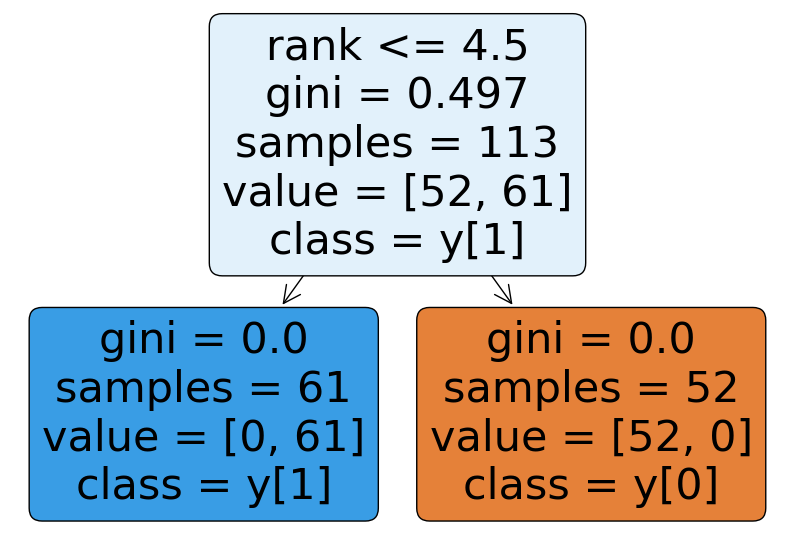

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()
